In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import local_config

df = pd.read_csv(f'{local_config.DATA_DIR}/angle_testing/all_simulations_wrongxy.csv')

targ = 'x'

plt.scatter(df[f"Strain Rate {targ}"], df[f"Sigma_{targ}"], alpha=0.1, s=10)
plt.xlabel(f"Strain Rate {targ}")
plt.ylabel(f"Sigma {targ}")
plt.title(f"Strain vs stress ({targ})")
plt.show()


DP Parameters in $(\alpha, k)$ space

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

plt.scatter(df["alpha"], df["k"], color='black', s=20, alpha=0.2)
plt.xlabel(r"$\alpha$", fontsize=18)
plt.ylabel(r"$k$", fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Fit Drucker-Prager parameters for 1000 samples", fontsize=20)
plt.tight_layout()


DP Parameters in $\sigma_{ts}, \sigma_{cs}$ space

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drucker_prager_params.csv")

plt.figure(figsize=(8, 8))

cs = (3 * df["k"]) / (np.sqrt(3) - 3 * df["alpha"])
ts = (3 * df["k"]) / (np.sqrt(3) + 3 * df["alpha"])
bs = (3 * df["k"]) / (np.sqrt(3) + 6 * df["alpha"])


plt.scatter(ts, cs, color='red', s=20, alpha=0.2, label='Compressive')
plt.scatter(ts, bs, color='blue', s=20, alpha=0.2, label='Biaxial Tensile')
plt.xlabel(r"Uniaxial Tensile Strength (GPa)", fontsize=18)
plt.ylabel(r"Compressive or Biaxial Tensile Strength(GPa)", fontsize=18)

plt.xlim(20, 130)
plt.ylim(20, 130)

plt.legend(fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Uniaxial Tensile, Compressive, and Biaxial Tensile Strengths", fontsize=20)
plt.tight_layout()

Probing the DP Parameter constraints

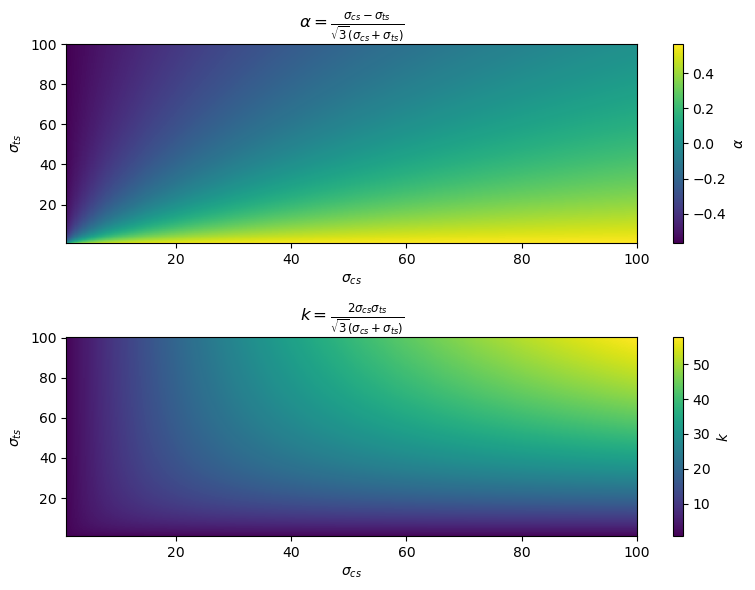

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define ranges for σ_cs and σ_ts
sigma_cs = np.linspace(1, 100, 500)
sigma_ts = np.linspace(1, 100, 500)

# Create meshgrid
CS, TS = np.meshgrid(sigma_cs, sigma_ts)

# Compute alpha
alpha = (CS - TS) / (np.sqrt(3) * (CS + TS))
k = (2 * CS * TS) / (np.sqrt(3) * (CS + TS))

# Plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

c0 = axs[0].pcolormesh(CS, TS, alpha, shading='auto', cmap='viridis')
fig.colorbar(c0, ax=axs[0], label=r'$\alpha$')

axs[0].set_xlabel(r'$\sigma_{cs}$')
axs[0].set_ylabel(r'$\sigma_{ts}$')
axs[0].set_title(r'$\alpha = \frac{\sigma_{cs} - \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

c1 = axs[1].pcolormesh(CS, TS, k, shading='auto', cmap='viridis')
fig.colorbar(c1, ax=axs[1], label=r'$k$')

axs[1].set_xlabel(r'$\sigma_{cs}$')
axs[1].set_ylabel(r'$\sigma_{ts}$')
axs[1].set_title(r'$k = \frac{2 \sigma_{cs} \sigma_{ts}}{\sqrt{3} (\sigma_{cs} + \sigma_{ts})}$')

plt.tight_layout()
plt.show()

$\alpha$ and $k$ as a function of $\theta$

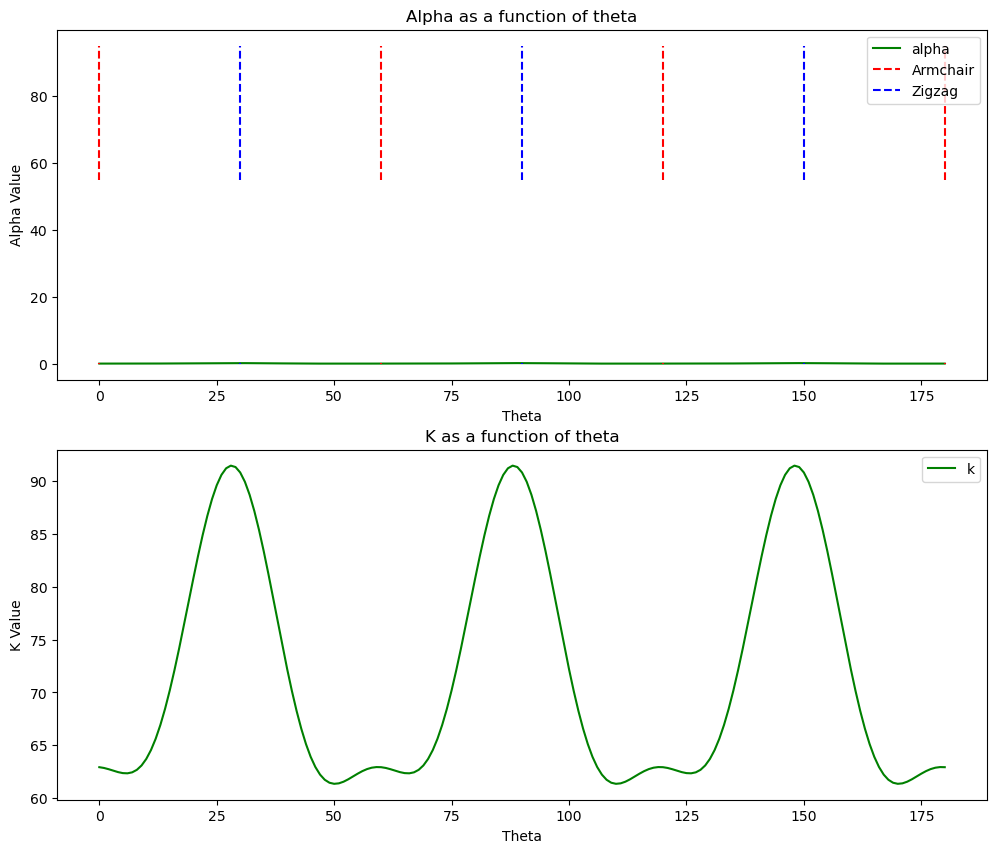

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("drucker_prager_params_thetas3D.csv")
def omega(theta):
    return 2 * np.pi * theta / 60

def alpha(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["a0"]
        + df["a1"] * np.cos(om)
        + df["a2"] * np.sin(om)
        + df["a3"] * np.cos(2 * om)
        + df["a4"] * np.sin(2 * om)
    )
    return val

def k(theta):
    om = omega(theta)

    # First + second harmonics for alpha and k
    val = (
        df["k0"]
        + df["k1"] * np.cos(om)
        + df["k2"] * np.sin(om)
        + df["k3"] * np.cos(2 * om)
        + df["k4"] * np.sin(2 * om)
    )
    return val

thetas = np.arange(0, 181, 1)
alphas = []
ks = []
for i in range(len(thetas)):
    alphas.append(alpha(i))
    ks.append(k(i))

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].plot(thetas, alphas, color='green', label='alpha')
axs[0].plot([0, 0], [0, 0.22], '--', color='red', label='Armchair')
axs[0].plot([60, 60], [0, 0.22], '--', color='red')
axs[0].plot([120, 120], [0, 0.22], '--', color='red')
axs[0].plot([180, 180], [0, 0.22], '--', color='red')
axs[0].plot([30, 30], [0, 0.22], '--', color='blue', label='Zigzag')
axs[0].plot([90, 90], [0, 0.22], '--', color='blue')
axs[0].plot([150, 150], [0, 0.22], '--', color='blue')
axs[0].set_xlabel("Theta")
axs[0].set_ylabel("Alpha Value")
axs[0].set_title("Alpha as a function of theta")
axs[0].legend()

axs[1].plot(thetas, ks, color='green', label='k')
axs[1].plot([0, 0], [55, 95], '--', color='red', label='Armchair')
axs[1].plot([60, 60], [55, 95], '--', color='red')
axs[1].plot([120, 120], [55, 95], '--', color='red')
axs[1].plot([180, 180], [55, 95], '--', color='red')
axs[1].plot([30, 30], [55, 95], '--', color='blue', label='Zigzag')
axs[1].plot([90, 90], [55, 95], '--', color='blue')
axs[1].plot([150, 150], [55, 95], '--', color='blue')
axs[1].set_xlabel("Theta")
axs[1].set_ylabel("K Value")
axs[1].set_title("K as a function of theta")
axs[1].legend()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

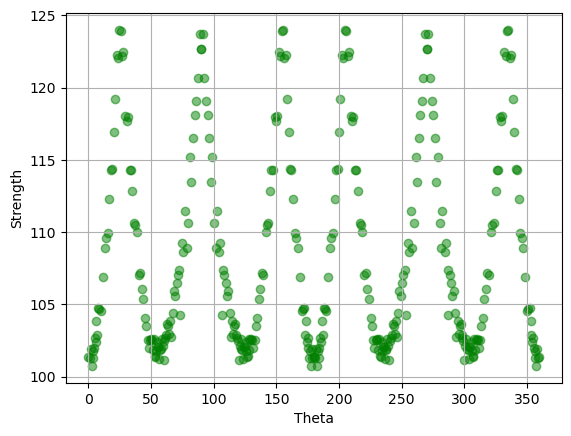

In [1]:
from filter_csv import filter_data
import local_config
import pandas as pd
import matplotlib.pyplot as plt

# ========== USER INTERFACE ==========
folder = f'{local_config.DATA_DIR}/rotation_tests'
csv_file = f"{folder}/all_simulations.csv"

exact_filters = {
    "Num Atoms x": 60,
    "Num Atoms y": 60,
    "Defects": "None",  # will match NaN or "None"
    # "Defect Percentage": 0.5,
    # "Defect Random Seed": 3,
    # "Theta Requested": 0
    # "Strain Rate x": 0.001,
    # "Strain Rate y": 0.001
}

range_filters = {
    # "Defect Percentage": (0.4, 0.6),
    # "Defect Random Seed": (0, 10)
    # "Theta Requested": (90, 90),
    # "Sigma_1": (4, 20)
}

or_filters = {
    # "Defect Type": ["SV", "DV"],
    # "Theta Requested": [0, 60]
}
# ====================================
df = pd.read_csv(csv_file)
filtered_df = filter_data(df, exact_filters=exact_filters, range_filters=range_filters, or_filters=or_filters, flip_strengths=False)

optimal_rows = []
for angle in range(0, 91, 1):
    this_df = filter_data(filtered_df, exact_filters={"Theta Requested": angle})
    
    if this_df.empty:
        continue  # skip if no data for this angle

    this_df = this_df.copy()
    this_df["ratio"] = this_df["Strength_2"] / this_df["Strength_1"]

    # Find the row with the minimum ratio
    min_row = this_df.loc[this_df["ratio"].idxmin()]

    # Append the row to the list
    optimal_rows.append(min_row)

# Combine all optimal rows into a single DataFrame
optimal_df = pd.DataFrame(optimal_rows)

def mirror(num):
    dist = 90 - num
    new = num + (dist * 2)
    return new

# mirror across 90°: mirror(θ) = 180 - θ
mirrored_df = optimal_df.copy()
mirrored_df["Theta"] = 180 - mirrored_df["Theta"]
almost = pd.concat([optimal_df, mirrored_df], ignore_index=True)

more = almost.copy()
more["Theta"] = 360 - more["Theta"]

# stack originals + mirrored
result = pd.concat([almost, more], ignore_index=True)


# plt.scatter(result["Theta Requested"], result["Strength_1"], color='blue', alpha=0.5)
plt.scatter(result["Theta"], result["Strength_1"], color='green', alpha=0.5)

plt.xlabel("Theta")
plt.ylabel("Strength")
plt.grid()
plt.show


k0=109.352437, k1=-8.998102, k2=0.000000, k3=1.794647, k4=-0.000000
R^2 = 0.8571


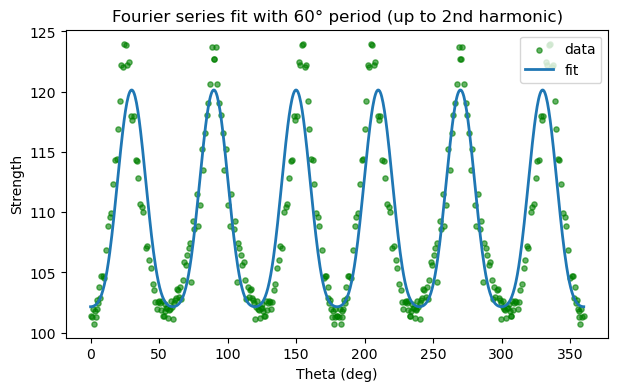

In [2]:
import numpy as np
import matplotlib.pyplot as plt

df = result.copy()
theta = df["Theta"].to_numpy()           # degrees
y = df["Strength_1"].to_numpy().astype(float)

# Build design matrix
omega = 2*np.pi*theta/60.0
X = np.column_stack([
    np.ones_like(omega),                 # k0
    np.cos(omega),                       # k1
    np.sin(omega),                       # k2
    np.cos(2*omega),                     # k3
    np.sin(2*omega)                      # k4
])

# Solve least squares: X @ k ≈ y
k, *_ = np.linalg.lstsq(X, y, rcond=None)
k0, k1, k2, k3, k4 = k
print(f"k0={k0:.6f}, k1={k1:.6f}, k2={k2:.6f}, k3={k3:.6f}, k4={k4:.6f}")

# R^2
yhat = X @ k
ss_res = np.sum((y - yhat)**2)
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - ss_res/ss_tot
print(f"R^2 = {r2:.4f}")

# Predictor
def k_pred(theta_deg):
    theta_deg = np.asarray(theta_deg)
    w = 2*np.pi*theta_deg/60.0
    Xq = np.column_stack([
        np.ones_like(w),
        np.cos(w),
        np.sin(w),
        np.cos(2*w),
        np.sin(2*w)
    ])
    return Xq @ k

# Plot fit
grid = np.linspace(0, 360, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta, y, s=14, alpha=0.6, c='g', label="data")
plt.plot(grid, k_pred(grid), linewidth=2, label="fit")
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Fourier series fit with 60° period (up to 2nd harmonic)")
plt.legend()
plt.show()

k0 = 109.352437
k1 = -8.998102
k2 = 0.000000   (enforced k2 = 2*k4)
k3 = 1.794647
k4 = 0.000000
R^2 = 0.8571
Derivative at 30, 90, 150 deg: [9.59752963e-16 6.22372425e-16 1.03728737e-15]


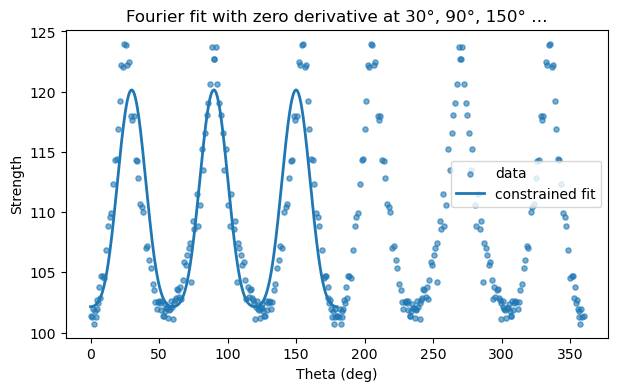

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# expects optimal_df with columns "Theta" and "Strength"
df = result.copy()
theta = df["Theta"].to_numpy().astype(float)        # degrees
y = df["Strength_1"].to_numpy().astype(float)

# fundamental angle with 60° period
omega = 2*np.pi*theta/60.0

# Constrained model:
# k(theta) = k0 + k1 cos(ω) + (2t) sin(ω) + k3 cos(2ω) + t sin(2ω)
# parameters = [k0, k1, k3, t]
X = np.column_stack([
    np.ones_like(omega),                # k0
    np.cos(omega),                      # k1
    np.cos(2*omega),                    # k3
    (2*np.sin(omega) + np.sin(2*omega))# t used for k2 and k4
])

# Solve least squares
params, *_ = np.linalg.lstsq(X, y, rcond=None)
k0, k1, k3, t = params
k2, k4 = 2*t, t

print(f"k0 = {k0:.6f}")
print(f"k1 = {k1:.6f}")
print(f"k2 = {k2:.6f}   (enforced k2 = 2*k4)")
print(f"k3 = {k3:.6f}")
print(f"k4 = {k4:.6f}")

# Fit quality
yhat = X @ params
ss_res = np.sum((y - yhat)**2)
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - ss_res/ss_tot
print(f"R^2 = {r2:.4f}")

# Predictor with the recovered k0..k4
def k_pred(theta_deg):
    theta_deg = np.asarray(theta_deg, dtype=float)
    w = 2*np.pi*theta_deg/60.0
    return (k0
            + k1*np.cos(w)
            + k2*np.sin(w)
            + k3*np.cos(2*w)
            + k4*np.sin(2*w))

# Optional: verify derivative is zero at 30°, 90°, 150° ...
def dk_dtheta(theta_deg):
    # derivative with respect to degrees
    w = 2*np.pi*theta_deg/60.0
    dwdtheta = 2*np.pi/60.0
    return dwdtheta * (-k1*np.sin(w) + k2*np.cos(w) - 2*k3*np.sin(2*w) + 2*k4*np.cos(2*w))

check_pts = np.array([30, 90, 150])
print("Derivative at 30, 90, 150 deg:", dk_dtheta(check_pts))

# Plot
grid = np.linspace(0, 360, 721)
plt.figure(figsize=(7,4))
plt.scatter(theta, y, s=14, alpha=0.6, c='g', label="data")
plt.plot(grid, k_pred(grid), linewidth=2, label="constrained fit")
plt.xlabel("Theta (deg)")
plt.ylabel("Strength")
plt.title("Fourier fit with zero derivative at 30°, 90°, 150° …")
plt.legend()
plt.show()